In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [7]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [8]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\HP\AppData\Local\Temp\ipykernel_13616\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [9]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': '### Thursday, April 3, 2025\n\n### Thursday, March 27, 2025\n\n### Wednesday, March 26, 2025\n\n### Tuesday, March 25, 2025\n\n### Thursday, March 20, 2025\n\n### Wednesday, March 19, 2025\n\n### Tuesday, March 18, 2025\n\n### Monday, March 17, 2025\n\n### Thursday, March 6, 2025\n\n### Wednesday, March 5, 2025\n\n### Tuesday, March 4, 2025\n\n### Thursday, February 27, 2025\n\n### Wednesday, February 26, 2025\n\n### Tuesday, February 25, 2025\n\n### Friday, February 21, 2025\n\n### Thursday, February 20, 2025 [...] ![ScienceDaily](/images/sd-logo.png)\n\n# Artificial Intelligence News\n\n## Top Headlines\n\n## Latest Headlines\n\n## Earlier Headlines\n\n### Wednesday, May 7, 2025\n\n### Tuesday, May 6, 2025\n\n### Monday, May 5, 2025\n\n### Thursday, May 1, 2025\n\n### Wednesday, April 30, 2025\n\n### Friday, April 25, 2025\n\n##

In [10]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [11]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [12]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, so the user is asking, "What is AI?" Hmm, where do I start? I need to define AI first. Let me think... AI stands for Artificial Intelligence. It\'s a broad field, right? So maybe I should break it down into components. Let me recall what I know.\n\nFirst, AI is a branch of computer science. The main goal is to create machines that can perform tasks requiring human-like intelligence. But how exactly? Oh right, there are various approaches. Maybe I should mention some key areas like machine learning, deep learning, and neural networks.\n\nWait, the user might not be familiar with those terms, so maybe start with a simple definition. AI involves machines that can perceive their environment and take actions to maximize the chance of successfully achieving goals. That\'s from the textbook definition. But maybe I should also touch on the history a bit. The term was coined in the 1950s, right? Dartmouth Conference in 1956? That\'s a good point to include fo

In [13]:
llm_with_tools=llm.bind_tools(tools=tools)


In [14]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qpsvx5ffb', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 270, 'total_tokens': 404, 'completion_time': 0.31080709, 'prompt_time': 0.014665707, 'queue_time': 0.26649665300000003, 'total_time': 0.325472797}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_9faf42d81f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e533ba1f-4f34-4aee-b1fb-11d58374b92f-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'qpsvx5ffb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 270, 'output_tokens': 134, 'total_tokens': 404})

In [15]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qgtxfqx5a', 'function': {'arguments': '{"query":"quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 226, 'prompt_tokens': 271, 'total_tokens': 497, 'completion_time': 0.533629502, 'prompt_time': 0.01785424, 'queue_time': 0.27160117, 'total_time': 0.551483742}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_18a313a21d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ce4e1f77-89ba-4cd9-abcd-769d32cc7372-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'qgtxfqx5a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 271, 'output_tokens': 226, 'total_tokens': 497})

In [16]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '09hz02ja9', 'function': {'arguments': '{"query":"Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 340, 'prompt_tokens': 267, 'total_tokens': 607, 'completion_time': 0.835470686, 'prompt_time': 0.016221051, 'queue_time': 0.24621806900000004, 'total_time': 0.851691737}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--91522204-3d31-44f2-977d-775ee6433a81-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': '09hz02ja9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 267, 'output_tokens': 340, 'total_tokens': 607})

## Workflow 

In [17]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [18]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [19]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

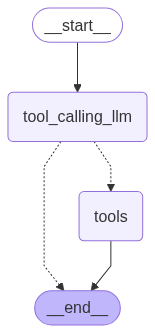

In [20]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (r73zx8r83)
 Call ID: r73zx8r83
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [22]:
messages=graph.invoke({"messages":"Hi My name is Hardik"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Hardik
================================== Ai Message ==================================

Hello Hardik! How can I assist you today?


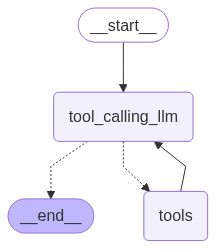

In [23]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (bwtqtpcvg)
 Call ID: bwtqtpcvg
  Args:
    query: recent AI news
  arxiv (4wa61xjtr)
 Call ID: 4wa61xjtr
  Args:
    query: recent quantum computing research papers
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI Breakthroughs and News: May-June 2025 - Crescendo.ai", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "**Date:** June 1, 2025  \n**Summary:** Ukraine reportedly used AI-enhanced drone swarms in a covert mission dubbed âOperation Spider Webâ to target a Russian bomber. The drones, said to cost as little as the price of an iPhone 16 Pro, represent a new phase